In [2]:
#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from plotnine import *
import matplotlib.pyplot as plt

In [3]:
#importing the dataset
superstore_data=pd.read_csv("SampleSuperstore.csv")

In [4]:
#viewing the data
superstore_data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
#deleting the postal code column 
col=['Postal Code']
superstore_sample=superstore_data.drop(columns=col,axis=1)
superstore_sample.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
superstore_sample.shape

(9994, 12)

#we have 9,994 rows and 12 columns(attributes) 

In [8]:
superstore_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [9]:
superstore_sample.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [10]:
#checking whether we have any duplicate data or not in the data 
superstore_sample.duplicated().sum()

50

In [11]:
#removing the 50 duplicate values which we found in the data 
superstore_sample.drop_duplicates(inplace=True)
superstore_sample.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
#now let us check whether the duplicate values are removed or not 
superstore_sample.duplicated().sum()

0

In [13]:
superstore_sample.shape

(9944, 12)

In [14]:
#let us see for each attribute how many different type of variables are there
superstore_sample.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

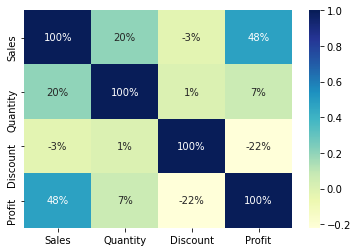

In [15]:
#correlation between the variables(sales,quantity,discount,profit)
sns.heatmap(superstore_sample.corr(),annot=True,fmt='.0%',cmap="YlGnBu")
plt.show()

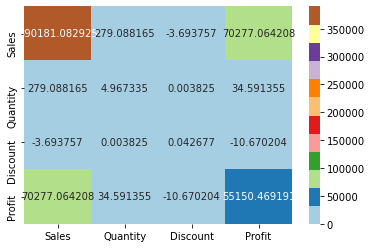

In [16]:
#covariance of the variables(sales,quantity,discount,profit)
sns.heatmap(superstore_sample.cov(),annot=True,fmt="f",cmap="Paired")
plt.show()

In [17]:
#EDA DATA VISUALISATION

Text(0.5, 1.0, 'Superstore Categories')

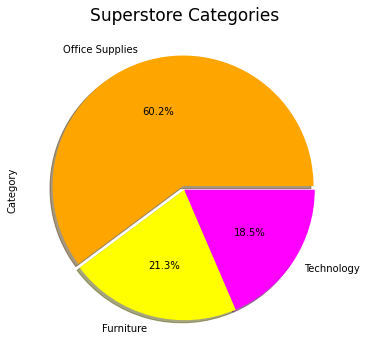

In [27]:
#superstore category visualisation
plt.figure(figsize=(15,6))
scv=superstore_sample['Category'].value_counts()
cmap=plt.get_cmap('Spectral')
colors=['orange','yellow','magenta']
scv.plot.pie(autopct="%1.1f%%",shadow=True,colors=colors,explode=(0.03,0,0))
plt.title("Superstore Categories",fontsize=17)

#From the above pie chart we can say that the store has Office Supplies more than the Furniture and Technology

In [31]:
#VISUALIZING THE SUB-CATEGORY
superstore_sample['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

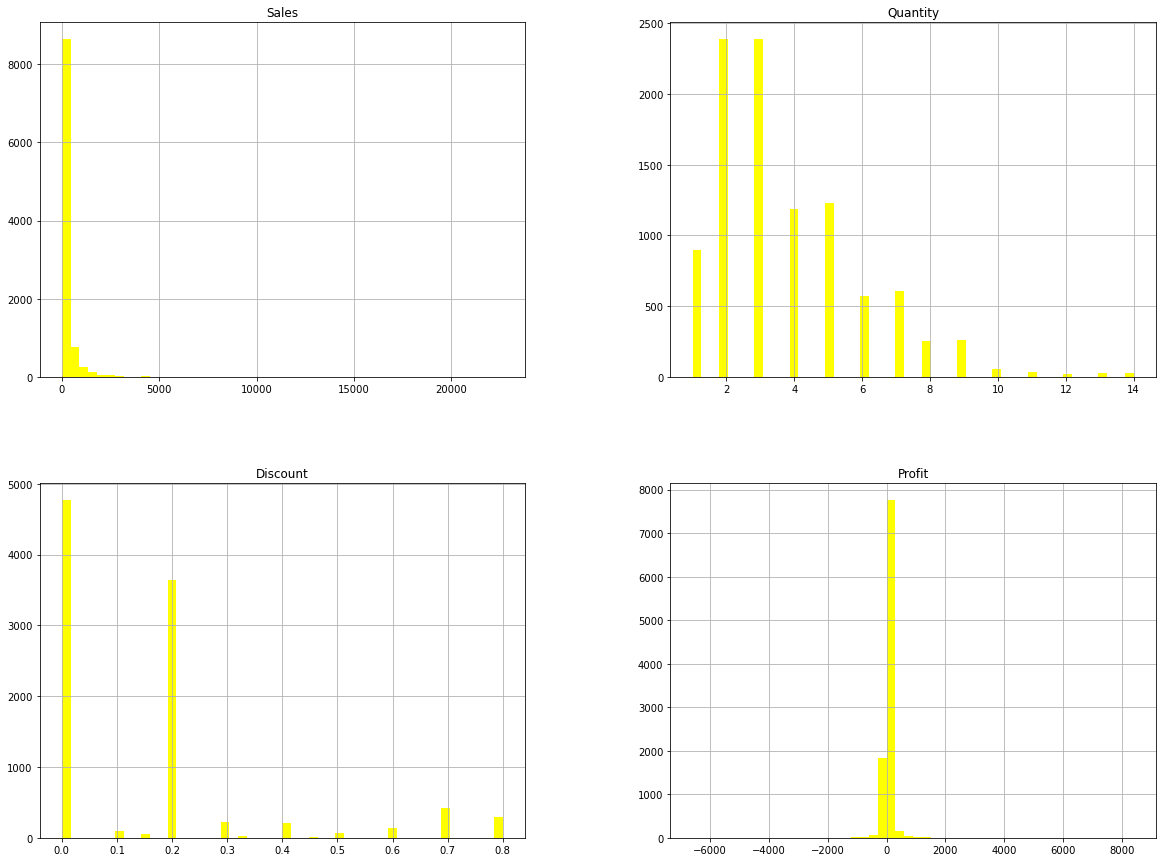

In [19]:
superstore_sample.hist(bins=50,figsize=(20,15),color='yellow')


C:\Users\ashis\anaconda3\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors
C:\Users\ashis\anaconda3\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors


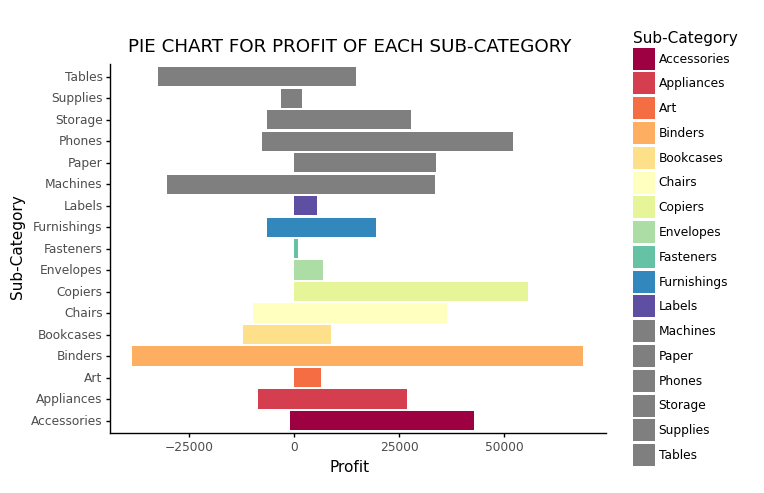

<ggplot: (160561236312)>

In [21]:
plot_profit=(ggplot(superstore_sample, aes(x='Sub-Category', y='Profit', fill='Sub-Category'))+geom_col() +coord_flip()
+scale_fill_brewer(type='div',palette="Spectral")+theme_classic() +ggtitle('PIE CHART FOR PROFIT OF EACH SUB-CATEGORY'))

display(plot_profit)

#FROM THE ABOVE CHART WE CAN INFER THAT THE COPIERS HAS MAXIMUM PROFIT WITHOUT ANY LOSS AND ALSO THE BINDERS HAVE EQUAL PROFIT AND LOSS VARIATION 

C:\Users\ashis\anaconda3\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


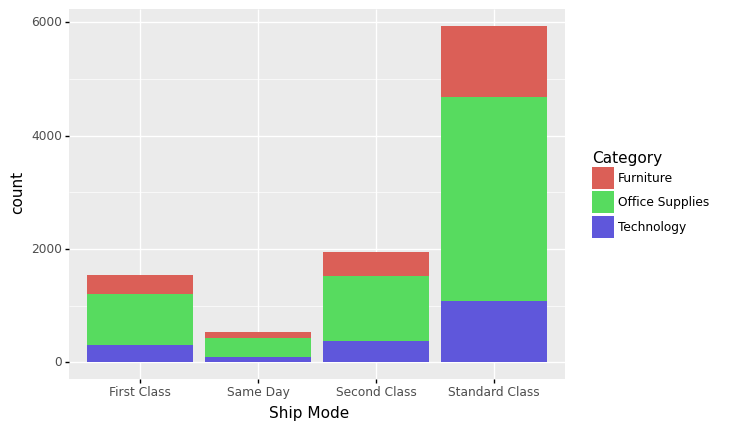

<ggplot: (160561009324)>

In [22]:
#plot for ship mode vs count
ggplot(superstore_sample,aes(x="Ship Mode" , fill= "Category")) +geom_bar(stat='count')+ scale_colour_brewer(palette="OrRd")

#IN THE ABOVE CHART WE CAN SEE THAT MOST OF THE CUSTOMERS HAVE CHOOSEN THE STANDARD CLASS DELIVERY AND IN THAT THE OFFICE SUPPLIES ARE MORE 

In [24]:
superstore_sample['Ship Mode'].value_counts()

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

In [45]:
#counting the number of times each state is repeated
superstore_sample['State'].value_counts()

California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

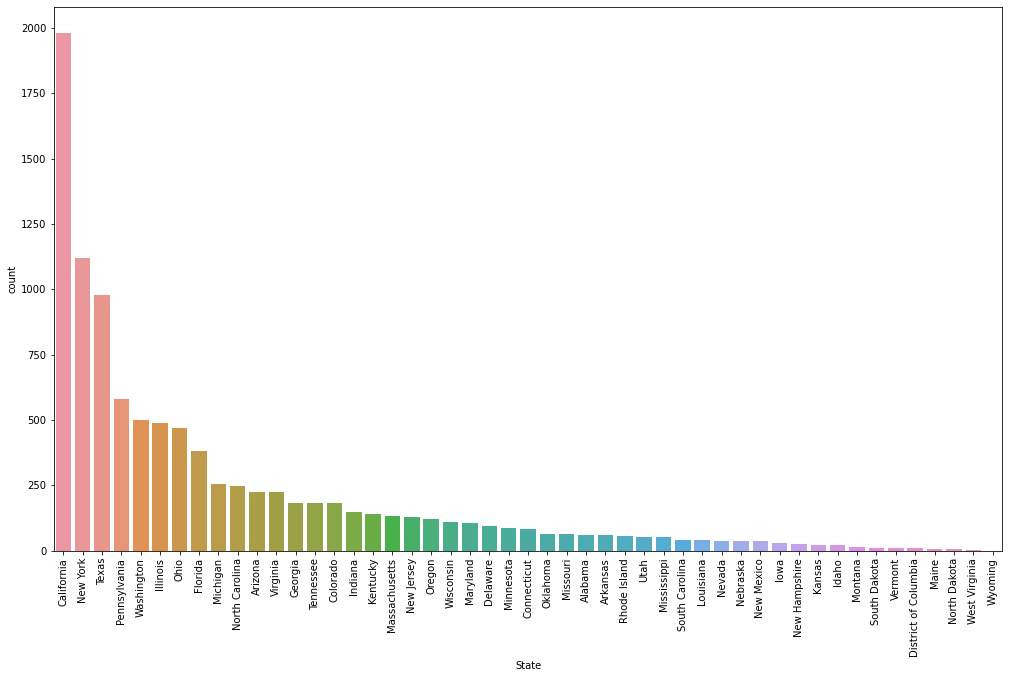

In [49]:
plt.figure(figsize=(17,10))
sns.countplot(x='State',data=superstore_sample,order=superstore_sample['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#IN THE ABOVE CHART WE CAN SEE AND SAY THAT THE STATE CALIFORNIA HAS THE MORE NUMBER OF SALES THAN ALL THE OTHER STATES. 

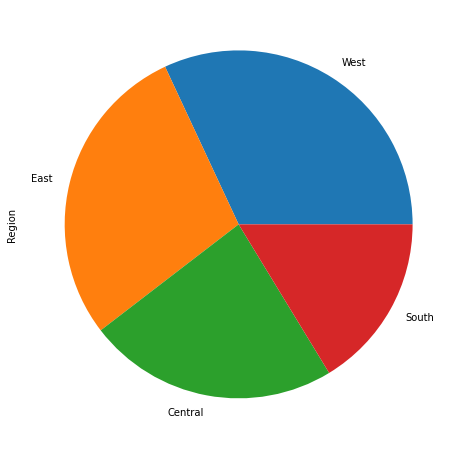

In [35]:
plt.figure(figsize=(10,8))
superstore_sample['Region'].value_counts().plot.pie()
plt.show()

#THE WEST REGION OF UNITED STATES HAS MORE SALES

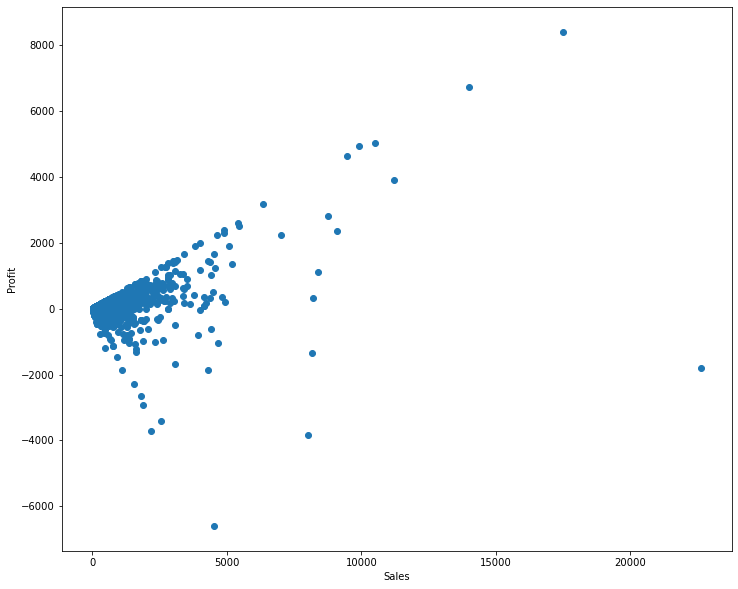

In [36]:
#profit vs discount scatter plot

plt.subplots(figsize=(12,10))
plt.scatter(superstore_sample['Sales'],superstore_sample['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

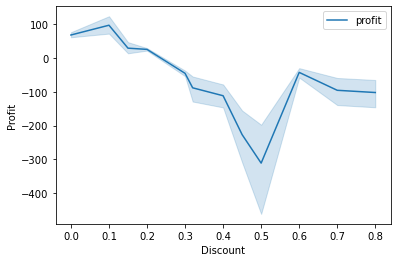

In [37]:
sns.lineplot(x='Discount',y='Profit',label="profit",data=superstore_sample)
plt.legend()
plt.show()

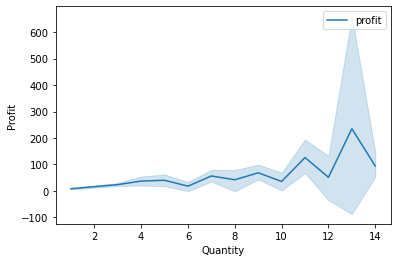

In [38]:
#profit vs quantity

sns.lineplot(x='Quantity',y='Profit',label="profit",data=superstore_sample)
plt.legend()
plt.show()

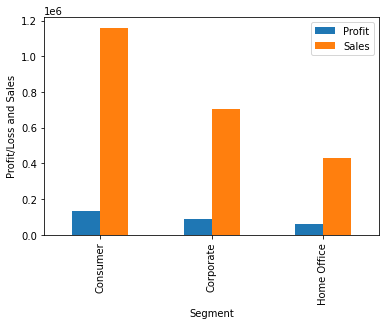

In [39]:
superstore_sample.groupby('Segment')[['Profit','Sales']].sum().plot.bar()
plt.ylabel('Profit/Loss and Sales')
plt.show()

#WE CAN SEE FROM THE ABOVE CHART THAT THE CONSUMER SEGMENT HAS MORE PROFIT AND SALES THAN THE OTHER SEGMENTS

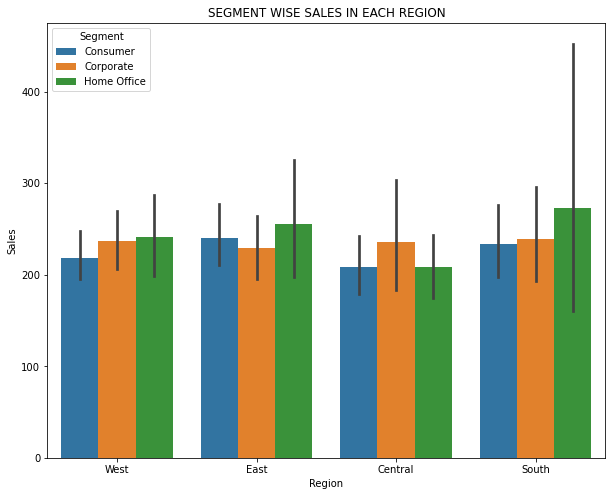

In [40]:
#SEGMENT WISE SALES IN EACH REGION

plt.figure(figsize=(10,8))
plt.title('SEGMENT WISE SALES IN EACH REGION')
sns.barplot(x='Region',y='Sales', data=superstore_sample, hue='Segment',order=superstore_sample['Region'].value_counts().index)
plt.xlabel('Region')
plt.show()

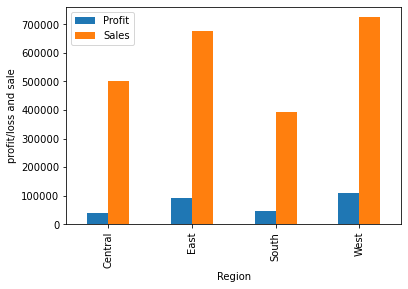

In [41]:
superstore_sample.groupby('Region')[['Profit','Sales']].sum().plot.bar()
plt.ylabel('profit/loss and sale')
plt.show()

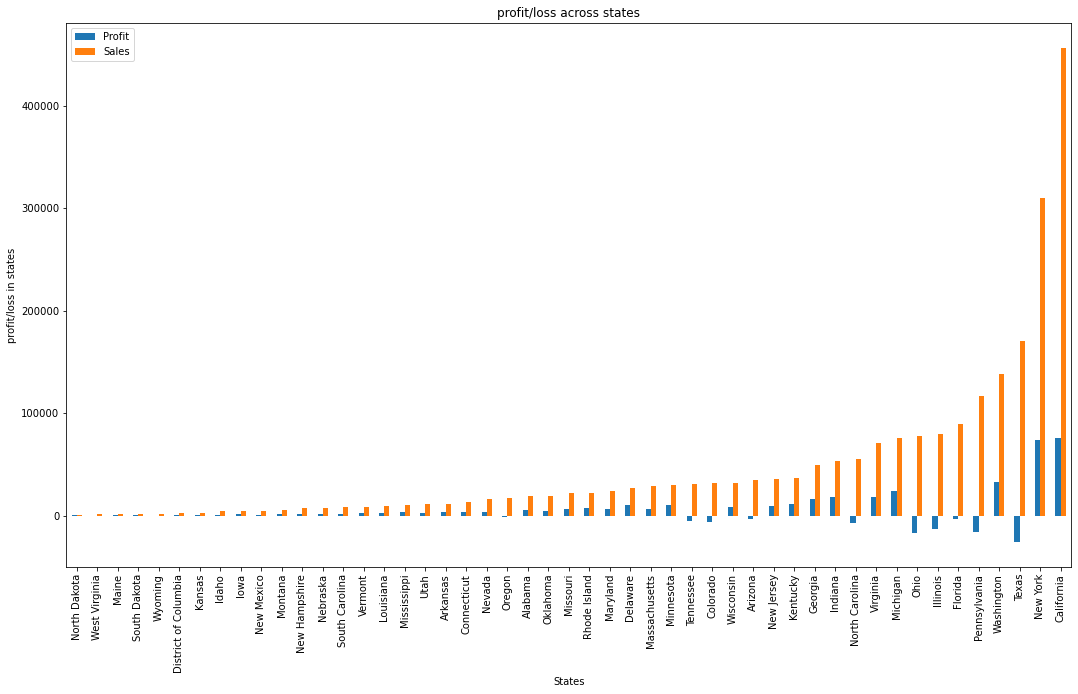

In [43]:
superstore_sample.groupby('State')[['Profit','Sales']].sum().sort_values(by='Sales',ascending=True).plot.bar(figsize=(18,10))
plt.title('profit/loss across states')
plt.xlabel('States')
plt.ylabel('profit/loss in states')
plt.show()

#IN THE ABOVE CHART WE CAN SEE THE SALES IN CALIFORNIA HAS MORE PROFIT AND SALES WITHOUT ANY LOSS

In [44]:
top_states=superstore_sample['State'].value_counts().nlargest(10)
top_states

California        1980
New York          1119
Texas              980
Pennsylvania       581
Washington         502
Illinois           490
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

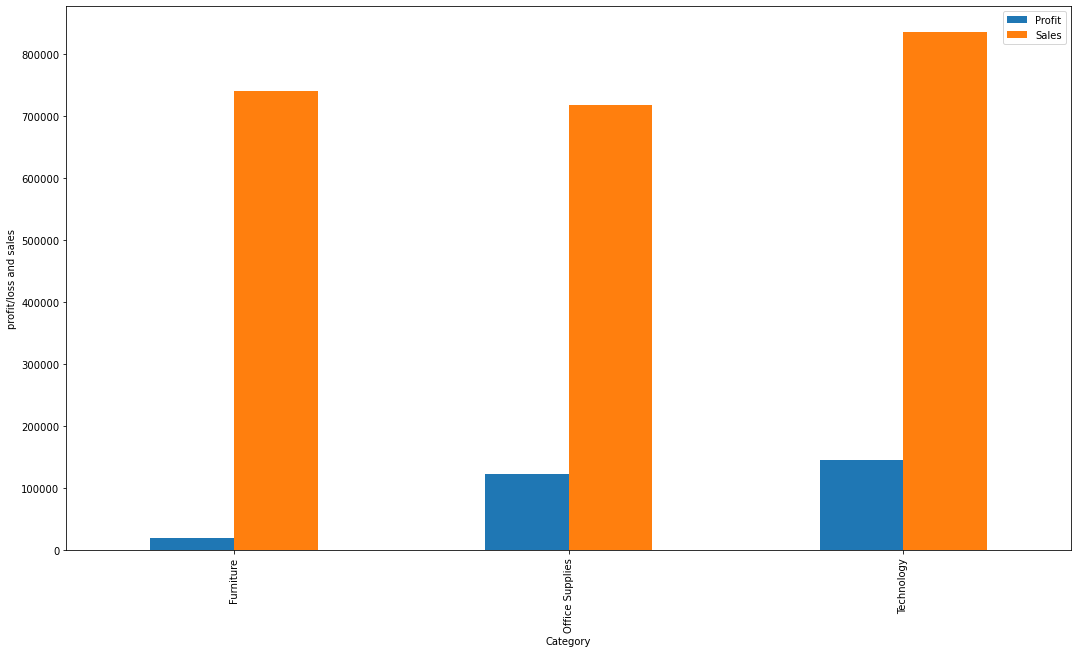

In [50]:
superstore_sample.groupby('Category')[['Profit','Sales']].sum().plot.bar(figsize=(18,10))
plt.ylabel('profit/loss and sales')
plt.show()

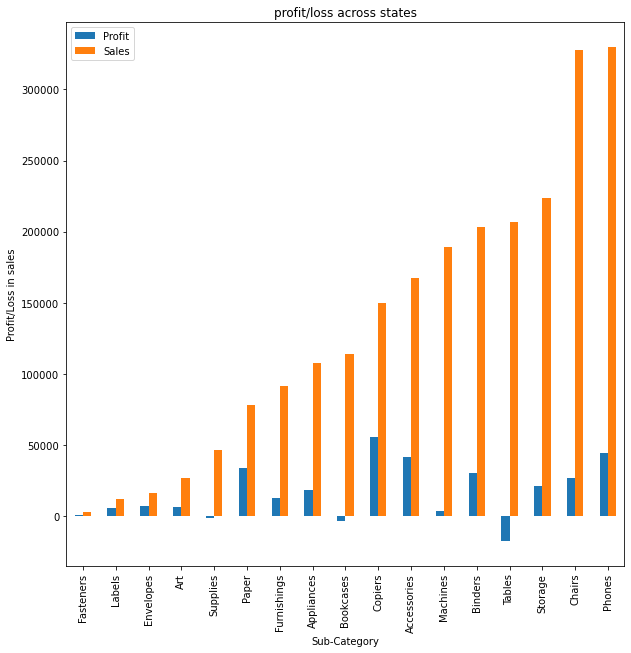

In [53]:
superstore_sample.groupby('Sub-Category')[['Profit','Sales']].sum().sort_values(by='Sales',ascending=True).plot.bar(figsize=(10,10))
plt.title('profit/loss across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/Loss in sales')
plt.show()